In [ ]:
import pandas as pd
from sklearn import metrics
# import matplotlib.pyplot as plt

{'accuracy': 0.7072,
 'conf_mat_display': <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x1244b755e70>,
 'classification_report_': {'1': {'precision': 0.7727272727272727,
   'recall': 0.4146341463414634,
   'f1-score': 0.5396825396825397,
   'support': 41},
  '2': {'precision': 0.5606936416184971,
   'recall': 0.6258064516129033,
   'f1-score': 0.5914634146341463,
   'support': 155},
  '3': {'precision': 0.7952755905511811,
   'recall': 0.8189189189189189,
   'f1-score': 0.8069241011984022,
   'support': 370},
  '4': {'precision': 0.5227272727272727,
   'recall': 0.4423076923076923,
   'f1-score': 0.4791666666666667,
   'support': 52},
  '5': {'precision': 0.4,
   'recall': 0.2857142857142857,
   'f1-score': 0.3333333333333333,
   'support': 7},
  'accuracy': 0.7072,
  'macro avg': {'precision': 0.6102847555248447,
   'recall': 0.5174762989790527,
   'f1-score': 0.5501140111030176,
   'support': 625},
  'weighted avg': {'precision': 0.7085169909095047,
   'recall': 

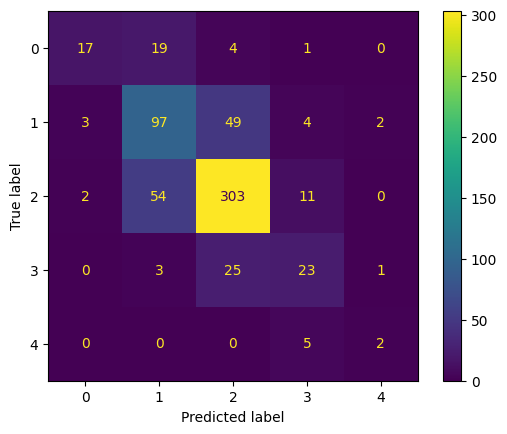

In [8]:
def multiple_metrics(tsv_filepath):

    df = pd.read_csv(tsv_filepath, sep='	', header=None)
    golds = []
    preds = []
    for i in df[0]:
        if i[0:9] == ' - Gold: ':
            stripped_g = i.strip(' - Gold: ')
            golds.append(stripped_g)
        elif i[0:9] == ' - Pred: ':
            stripped_p = i.strip(' - Pred: ')
            preds.append(stripped_p)

    # combine the two lists into a df
    preds_and_actuals = pd.DataFrame({'golds': golds, 'preds': preds})

    accuracy = metrics.accuracy_score(preds_and_actuals['golds'], preds_and_actuals['preds'])

    conf_mat = metrics.confusion_matrix(preds_and_actuals['golds'], preds_and_actuals['preds'])
    conf_mat_display = metrics.ConfusionMatrixDisplay(conf_mat)
    conf_mat_display.plot()
    classification_report_ = metrics.classification_report(preds_and_actuals['golds'], preds_and_actuals['preds'], output_dict=True)

    return {'accuracy': accuracy, 'conf_mat_display': conf_mat_display, 'classification_report_': classification_report_}

# a quick note -- while this function prints the confusion matrix out automatically, it also saves it as the second key in the dictionary
# this enables you to access it like any other key/value pair in a dictionary and call it and plot it later on
# you can do something like the following if you just want to return the conf mat: multiple_metrics('first_test.tsv')['conf_mat_display'].plot()
multiple_metrics('first_test.tsv')